## Experiment 1- SGD Regressor 

### 1. Read and explore data

In [1]:
import pandas as pd

# Read the data into a DataFrame'
df_train = pd.read_csv("../../data/raw/sales_train.csv")
df_test = pd.read_csv("../../data/raw/sales_test.csv")

In [2]:
df_train.shape, df_test.shape

((30490, 1547), (30490, 400))

In [3]:
df_train.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1532,d_1533,d_1534,d_1535,d_1536,d_1537,d_1538,d_1539,d_1540,d_1541
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,1,0,1,0,1,0,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,8,2,0,8,2,3,1,1,3,8
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,0,1,3,2,1,1,2,2,3


In [4]:
df_test.head()

,d_1542,d_1543,d_1544,d_1545,d_1546,d_1547,d_1548,d_1549,d_1550,d_1551,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,0,1,0,2,1,0,2,0,1,0,...,2,4,0,0,0,0,3,3,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,1,2,1,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,4,1,0,1,3,5,2,3,0,2,...,1,1,0,4,0,1,3,0,2,6
4,3,0,0,1,1,0,2,0,2,1,...,0,0,0,2,1,0,0,2,1,0


In [5]:
# Drop unnecessary columns
df_train.drop(["id", "dept_id", "cat_id", "state_id"], inplace=True, axis=1)

In [6]:
# Load the "item_id" column from the training data
id_columns = df_train[["item_id", "store_id"]]

# Join the "item_id" and "store_id" columns to the test data
df_test = pd.concat([id_columns, df_test], axis=1)

In [7]:
df_test.head()

,item_id,store_id,d_1542,d_1543,d_1544,d_1545,d_1546,d_1547,d_1548,d_1549,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001,CA_1,0,1,0,2,1,0,2,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002,CA_1,0,0,0,0,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003,CA_1,0,0,0,0,0,1,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004,CA_1,4,1,0,1,3,5,2,3,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005,CA_1,3,0,0,1,1,0,2,0,...,0,0,0,2,1,0,0,2,1,0


### 2. Transform Data

In [8]:
import sys
sys.path.append('../../src/data')

# import the function from filter_items script
from filter_items import filter_bypercent
df_train_filtered = filter_bypercent(df_train)

In [9]:
# Check if all 'd_' columns have zeros, and keep items that were sold at least once
#df_filtered = df[df.iloc[:, 2:].sum(axis=1) > 0]

In [10]:
# pivot data to get days as data samples
df_train_filtered = df_train_filtered.melt(id_vars=['item_id', 'store_id'], var_name='d', value_name='units_sold')

In [11]:
df_train_filtered.head()

,item_id,store_id,d,units_sold
0,HOBBIES_1_001,CA_1,d_1,0
1,HOBBIES_1_002,CA_1,d_1,0
2,HOBBIES_1_004,CA_1,d_1,0
3,HOBBIES_1_005,CA_1,d_1,0
4,HOBBIES_1_006,CA_1,d_1,0


In [12]:
del df_train

In [13]:
df_train_filtered.shape

(35604805, 4)

In [14]:
# Peform same for test data
df_test_trans = df_test.melt(id_vars=['item_id', 'store_id'], var_name='d', value_name='units_sold')
del df_test

In [15]:
df_test_trans.head()

,item_id,store_id,d,units_sold
0,HOBBIES_1_001,CA_1,d_1542,0
1,HOBBIES_1_002,CA_1,d_1542,0
2,HOBBIES_1_003,CA_1,d_1542,0
3,HOBBIES_1_004,CA_1,d_1542,4
4,HOBBIES_1_005,CA_1,d_1542,3


### 3. Feature Engineering
Merge date and item's weekly sell price (from other given data) to get sales revenue by date

In [16]:
# import class from merge file
from merge import Merger
df_train_merged = Merger().merge_df(df_train_filtered)
df_test_merged = Merger().merge_df(df_test_trans)

In [17]:
df_train_merged.head()

,item_id,store_id,date,sell_price,revenue
0,HOBBIES_1_008,CA_1,2011-01-29,0.46,5.52
1,HOBBIES_1_008,CA_1,2011-01-30,0.46,6.90
2,HOBBIES_1_008,CA_1,2011-01-31,0.46,0.00
3,HOBBIES_1_008,CA_1,2011-02-01,0.46,0.00
4,HOBBIES_1_008,CA_1,2011-02-02,0.46,0.00


In [18]:
df_train_merged.shape, df_test_merged.shape

((29827642, 5), (12160986, 5))

In [19]:
del df_train_filtered
del df_test_trans

In [20]:
df_test_merged.head()

,item_id,store_id,date,sell_price,revenue
0,HOBBIES_1_001,CA_1,2015-04-19,8.26,0.00
1,HOBBIES_1_001,CA_1,2015-04-20,8.26,8.26
2,HOBBIES_1_001,CA_1,2015-04-21,8.26,0.00
3,HOBBIES_1_001,CA_1,2015-04-22,8.26,16.52
4,HOBBIES_1_001,CA_1,2015-04-23,8.26,8.26


In [21]:
sys.path.append("../../src/features")

# import function from build_features python script 
from build_features import get_date_features

df_train_cleaned = get_date_features(df_train_merged)
df_test_cleaned = get_date_features(df_test_merged)

In [22]:
df_train_cleaned.head()

,item_id,store_id,sell_price,revenue,year,month,day,weekday
0,HOBBIES_1_008,CA_1,0.46,5.52,2011,1,29,5
1,HOBBIES_1_008,CA_1,0.46,6.90,2011,1,30,6
2,HOBBIES_1_008,CA_1,0.46,0.00,2011,1,31,0
3,HOBBIES_1_008,CA_1,0.46,0.00,2011,2,1,1
4,HOBBIES_1_008,CA_1,0.46,0.00,2011,2,2,2


In [23]:
df_test_cleaned.head()

,item_id,store_id,sell_price,revenue,year,month,day,weekday
0,HOBBIES_1_001,CA_1,8.26,0.00,2015,4,19,6
1,HOBBIES_1_001,CA_1,8.26,8.26,2015,4,20,0
2,HOBBIES_1_001,CA_1,8.26,0.00,2015,4,21,1
3,HOBBIES_1_001,CA_1,8.26,16.52,2015,4,22,2
4,HOBBIES_1_001,CA_1,8.26,8.26,2015,4,23,3


### Data Visualisation

In [ ]:
import matplotlib.pyplot as plt

# Group the data by store
grouped = df_train_merged.groupby('store_id')

/var/folders/9j/gbzf9fpd7_v0wb8s40h7d7n80000gn/T/ipykernel_3258/1678140310.py:12: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()
/opt/homebrew/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


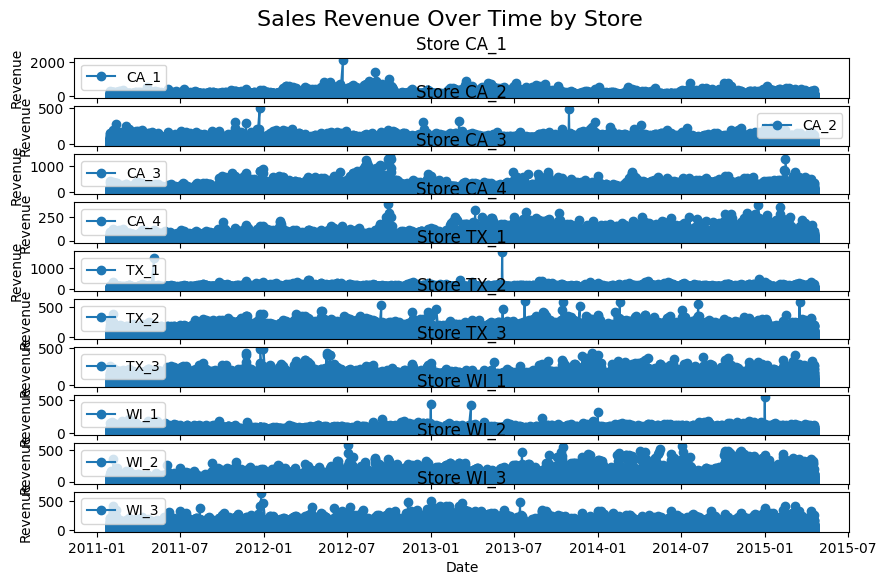

In [26]:
# Create separate subplots for each store
fig, axs = plt.subplots(len(grouped), figsize=(10, 6), sharex=True)
fig.suptitle('Sales Revenue Over Time by Store', fontsize=16)

for i, (store, group) in enumerate(grouped):
    axs[i].plot(group['date'], group['revenue'], marker='o', linestyle='-', label=store)
    axs[i].set_title(f'Store {store}')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Revenue')
    axs[i].legend()

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

**CA_1 has seen the highest sale of all the stores while CA_4 has seen the lowest.**

#### Update to memory issue: 

In [27]:
### Check for number of zero counts in the revenue. Stashes a lot of memory and not very useful in training

In [28]:
df_train_cleaned["revenue"].value_counts()

0.00      16405658
2.98        245999
1.98        232301
3.98        178698
5.96        156733
            ...   
110.74           1
30.10            1
37.17            1
197.46           1
41.01            1
Name: revenue, Length: 9381, dtype: int64

In [29]:
df_test_cleaned["revenue"].value_counts()

0.00      7206420
2.98       101631
1.98        84839
2.50        78087
3.98        68048
           ...   
191.82          1
136.08          1
225.12          1
121.00          1
150.86          1
Name: revenue, Length: 6321, dtype: int64

**55% in train and 59% in test of the sales revenue is zero. This will result in biased traning -  Remove null sales revenue from train.**

In [33]:
df_train_cleaned = df_train_cleaned[df_train_cleaned['revenue'] != 0]

In [34]:
df_train_cleaned.shape

(13421984, 8)

### Save the interim dataframe into a pickle file, uses less memory

In [35]:
df_train_cleaned.to_pickle("../../data/interim/predictive/train_cleaned.pkl")  
df_test_cleaned.to_pickle("../../data/interim/predictive/test_cleaned.pkl")  

### Load the processed dataframe if kernel restarts 

In [1]:
import pandas as pd
df_train_cleaned = pd.read_pickle("../../data/interim/predictive/train_cleaned.pkl")
df_test_cleaned = pd.read_pickle("../../data/interim/predictive/test_cleaned.pkl")

### 4. Modelling

In [2]:
import sys
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV,  KFold
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Define categorical and numerical columns
categorical_columns = ['item_id', 'store_id']
numerical_columns = ['sell_price', 'year', 'month', 'day', 'weekday']

# Splitting data into X (features) and y (target variable) in train and test sets
X_train = df_train_cleaned.drop(columns=['revenue'])
y_train = df_train_cleaned['revenue']

X_test = df_test_cleaned.drop(columns=['revenue'])
y_test = df_test_cleaned['revenue']

In [4]:
### Save the processed train and test features
X_train.to_pickle("../../data/processed/predictive/X_train.pkl")  
X_test.to_pickle("../../data/processed/predictive/X_test.pkl")  

y_train.to_pickle("../../data/processed/predictive/y_train.pkl")  
y_test.to_pickle("../../data/processed/predictive/y_test.pkl")  

In [5]:
sys.path.append("../../src/models/predictive")

In [6]:
# import class from train_model script
from train_model import ModelPipeline

# Create an instance of the ModelPipeline class
builder = ModelPipeline(numerical_columns, categorical_columns)

In [7]:
# Train the model by calling train function of the class ModelPipeline
pipeline = builder.train(X_train, y_train)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   9.1s
[Pipeline] ......... (step 2 of 2) Processing regressor, total=  34.9s


In [8]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['sell_price', 'year',
                                                   'month', 'day', 'weekday']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='infrequent_if_exist'),
                                                  ['item_id', 'store_id'])])),
                ('regressor',
                 SGDRegressor(alpha=0.001, early_stopping=True, max_iter=10000,
                              n_iter_no_change=10, penalty='elasticnet',
                              validation_fraction=0.2))],
         verbose=True)

### 5. Model Evaluation

In [9]:
# Evaluate the model on the train and test set
y_train_pred = pipeline.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error on Train Set:", mse_train)

y_test_pred = pipeline.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error on Test Set:", mse_test)

Mean Squared Error on Train Set: 142.76051990624745
Mean Squared Error on Test Set: 152.88024169802807


In [12]:
# Now you can use the pipeline for prediction
# For example, to predict the sales for a new data point:
new_data = pd.DataFrame({'item_id': ['HOBBIES_1_060'], 'store_id': ['CA_1'], 'sell_price': [30.98], 'date': ['2012-05-19']})

In [14]:
from predict_model import predict_df

In [15]:
predicted_sales = predict_df(new_data, pipeline)
print(predicted_sales)

[48.08094586]


### 6. Save model for deployment

In [16]:
from joblib import dump

dump(pipeline, '../../models/predictive/sgd_pipeline.joblib')

['../../models/predictive/sgd_pipeline.joblib']

## Appendix

### Using the dask dataframe to make batches of the dataframe

In [ ]:
import dask.dataframe as dd
# Convert the Pandas DataFrame to a Dask DataFrame
ddf = dd.from_pandas(df_cleaned, npartitions=4)

# Define categorical and numerical columns
categorical_columns = ['item_id', 'store_id']
numerical_columns = ['year', 'month', 'day', 'weekday']

ddf[numerical_columns] = ddf[numerical_columns].astype('float32')

# Splitting data into X (features) and y (target variable)
X = ddf.drop(columns=['revenue']).compute()
y = ddf['revenue'].compute()

In [ ]:
# Define a custom transformer to extract date features
class DateFeaturesExtractor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X['date'] = pd.to_datetime(X['date'])
        X['year'] = X['date'].dt.year
        X['month'] = X['date'].dt.month
        X['day'] = X['date'].dt.day
        X['weekday'] = X['date'].dt.weekday
        return X.drop(columns=['date'])

# Specify numerical and categorical columns
numerical_columns = ['year', 'month', 'day', 'weekday']
categorical_columns = ['item_id', 'store_id']

# Preprocessing pipeline for date features
date_feature_transformer = Pipeline([
    ('date_features', DateFeaturesExtractor()),
    ('scaler', StandardScaler())
])

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(drop='first'))
])

# Combine transformers for date and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', date_feature_transformer, ['date']),
        ('cat', categorical_transformer, categorical_columns),
    ])

# Model pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SGDRegressor())
])

# Separate features (X) and target (y)
X = df.drop(columns=['volume of sales'])
y = df['volume of sales']

# Fit the pipeline on your data
pipeline.fit(X, y)

# Now you can use the trained pipeline for prediction


### Grid Search to find best parameters, but was utilising a lot of time

In [ ]:
# Hyperparameter grid for grid search
param_grid = {
    'regressor__alpha': [0.0001, 0.001, 0.01, 0.1],
    'regressor__max_iter': [1000, 5000, 10000],
}

# Grid search with cross-validation
#cv = KFold(n_splits=5, shuffle=True, random_state=42)  # Use KFold for regression
grid_search = GridSearchCV(
    pipeline, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X, y)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Fit the model with the best hyperparameters
final_pipeline = grid_search.best_estimator_
final_pipeline.fit(X_train, y_train)

In [ ]:
# Evaluate the model on the test set
y_pred = final_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)